## Ender Pearl Trade Simulation

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Define constants
ENDER_PEARL_PROBABILITY = 0.0218  # Probability of ender pearl trade
NUM_SIMULATIONS = 10000  # Number of simulations
NUM_TRADES = 135 # Number of gold ingots traded

In [63]:
def simulate_trades():
    ender_pearl_trades = 0
    total_trades = 0
    while ender_pearl_trades < 1:
        total_trades += 1
        if np.random.random() < ENDER_PEARL_PROBABILITY:
            ender_pearl_trades += 1
    return total_trades

In [64]:
def simulate_4_trades():
    ender_pearl_trades = 0
    trade_number = 0
    while ender_pearl_trades < 4:
        trade_number += 1
        if np.random.random() < ENDER_PEARL_PROBABILITY:
            ender_pearl_trades += 1
    return trade_number

In [65]:
def simulate_complete_probability():
    trade_count = 0
    buffer = 0
    success_trades = 0
    complete_success = 0
    while trade_count < NUM_TRADES:
        trade_count += 1
        if np.random.random() < ENDER_PEARL_PROBABILITY:
            buffer += 1
            success_trades += 1
            if buffer == 4:  # Check if there's a set of 4 buffers
                complete_success += 1
                buffer = 0  # Reset buffer after successful trade
    return complete_success

In [66]:
# Simulate trades
trade_results = [simulate_trades() for _ in range(NUM_SIMULATIONS)]
trade_number = [simulate_4_trades() for _ in range(NUM_SIMULATIONS)]
complete_probability = [simulate_complete_probability() for _ in range(NUM_SIMULATIONS)]

In [67]:
# Analyze results
total_trades = 0
average_trades = np.mean(trade_results)
average_trade_number = np.mean(trade_number)
for i in range(NUM_SIMULATIONS):
  if complete_probability[i] != 0:
    total_trades += 1
print("Average number of trades to get an ender pearl trade:", average_trades)
print("Average number of trades to get a complete trade (4 ender pearl trades):", average_trade_number)
print("Complete Ender Pearl trade happened", total_trades, "out of",NUM_SIMULATIONS,"simulations(", (total_trades/NUM_SIMULATIONS)*100,"%) when gold was bartered",NUM_TRADES,"times")

Average number of trades to get an ender pearl trade: 45.4372
Average number of trades to get a complete trade (4 ender pearl trades): 182.3084
Complete Ender Pearl trade happened 3389 out of 10000 simulations( 33.89 %) when gold was bartered 135 times


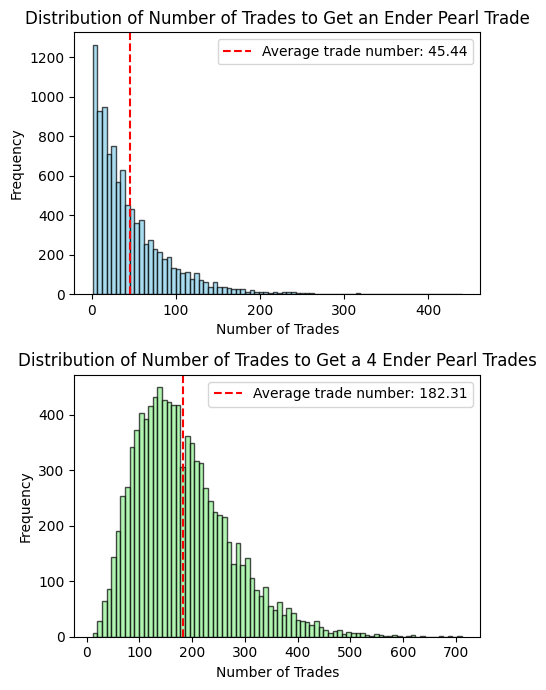

In [70]:
# Plotting trade results
plt.figure(figsize=(5, 7))

# Histogram of number of trades to get an ender pearl trade
plt.subplot(2, 1, 1)
plt.hist(trade_results, bins=80, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=average_trades, color='red', linestyle='--', label=f'Average trade number: {average_trades:.2f}')
plt.title('Distribution of Number of Trades to Get an Ender Pearl Trade')
plt.xlabel('Number of Trades')
plt.ylabel('Frequency')
plt.legend()

# Histogram of number of trades to get a complete trade
plt.subplot(2, 1, 2)
plt.hist(trade_number, bins=80, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(x=average_trade_number, color='red', linestyle='--', label=f'Average trade number: {average_trade_number:.2f}')
plt.title('Distribution of Number of Trades to Get a 4 Ender Pearl Trades')
plt.xlabel('Number of Trades')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()